## Exercise 1

1. Write a function $𝖻𝗂𝗇𝗈𝗆𝗂𝖺𝗅(𝗑,𝗇,𝗉)$ for the binomial distribution above, depending on parameters $x,n,p$, and test it with some prespecified values. Use the function `𝖼𝗁𝗈𝗈𝗌𝖾()` for the binomial coefficient.

2. Plot two binomials with n=20, and p=0.3,0.6 respectively.

In [10]:
binomial <- function(x,size,prob){
    # x    = quantiles
    # size = number of trials
    # prob = probability of 1
    p = choose(size, x) * prob^x * (1-prob)^(size-x)
    return(p)
}

In [21]:
#test
all.equal(binomial(3,9,0.5) ,dbinom(3,9,0.5))

[1] TRUE

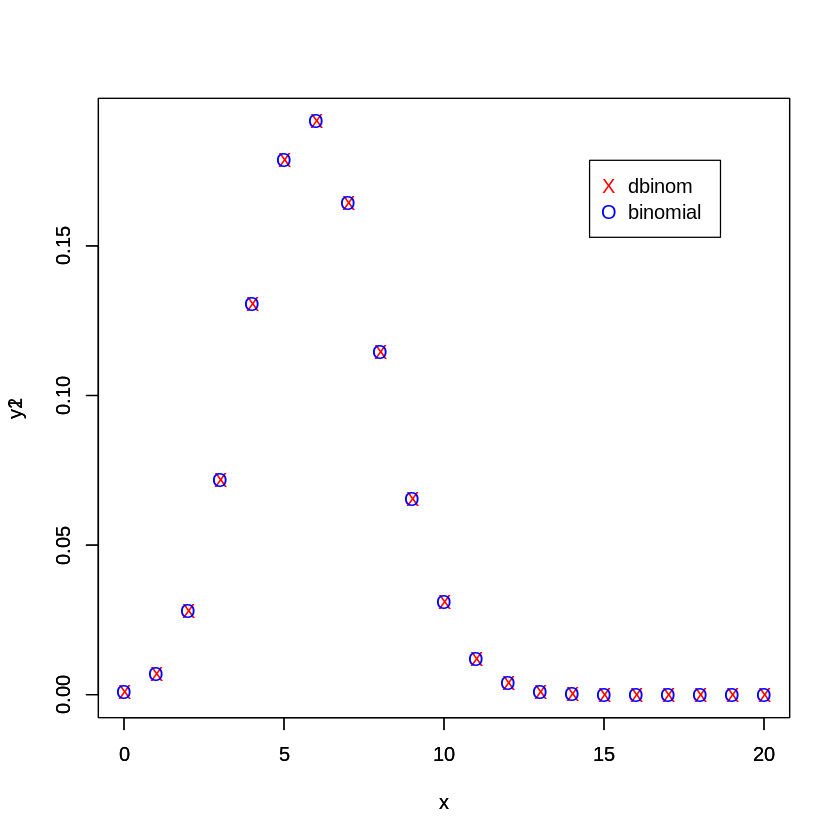

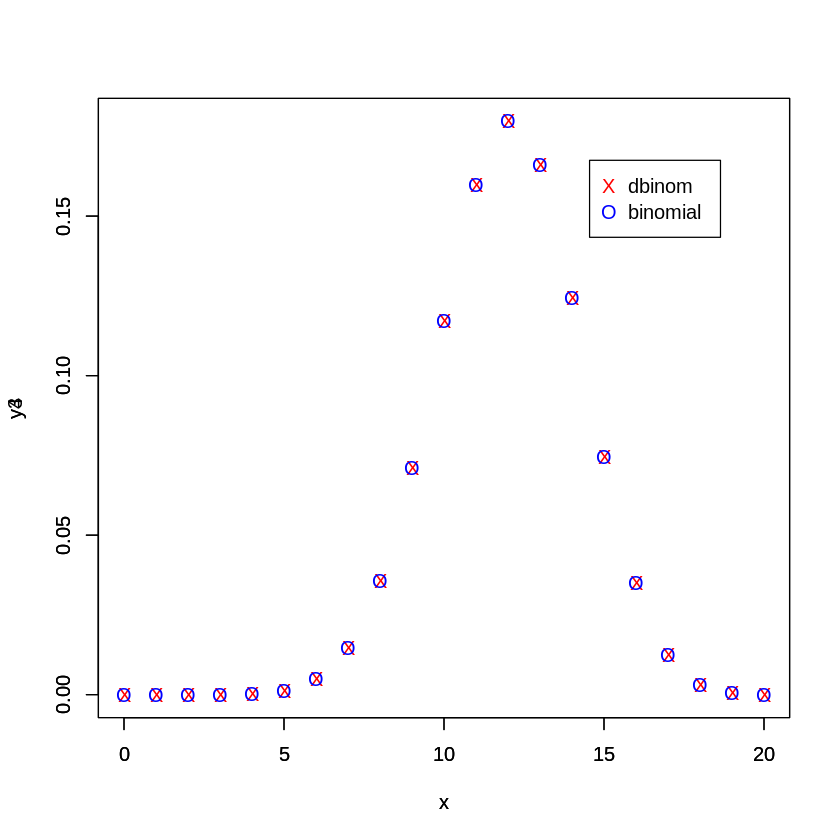

In [54]:
#plotting

x  <- seq(0,20,length=21)
y1 <- dbinom  (x,20,0.3)
y2 <- binomial(x,20,0.3)

plot(x,y1, pch="X", col="red")
par(new=TRUE)
plot(x,y2, pch="O", col="blue")
legend("topright", inset=0.1,c("dbinom","binomial"),  col=c("red","blue"), pch=c("X","O"))

y3 <- dbinom  (x,20,0.6)
y4 <- binomial(x,20,0.6)

plot(x,y3, pch="X", col="red")
par(new=TRUE)
plot(x,y4, pch="O", col="blue")
legend("topright",inset=0.1,c("dbinom","binomial"),  col=c("red","blue"), pch=c("X","O"))

## Exercise 2

Generate in 𝖱 the same output, but using `rgeom()` for generating the random variables. Hint: generate n times three geometric distribution X1,…,X3 with p=0.08, store them in a matrix and compute then the sum Y.

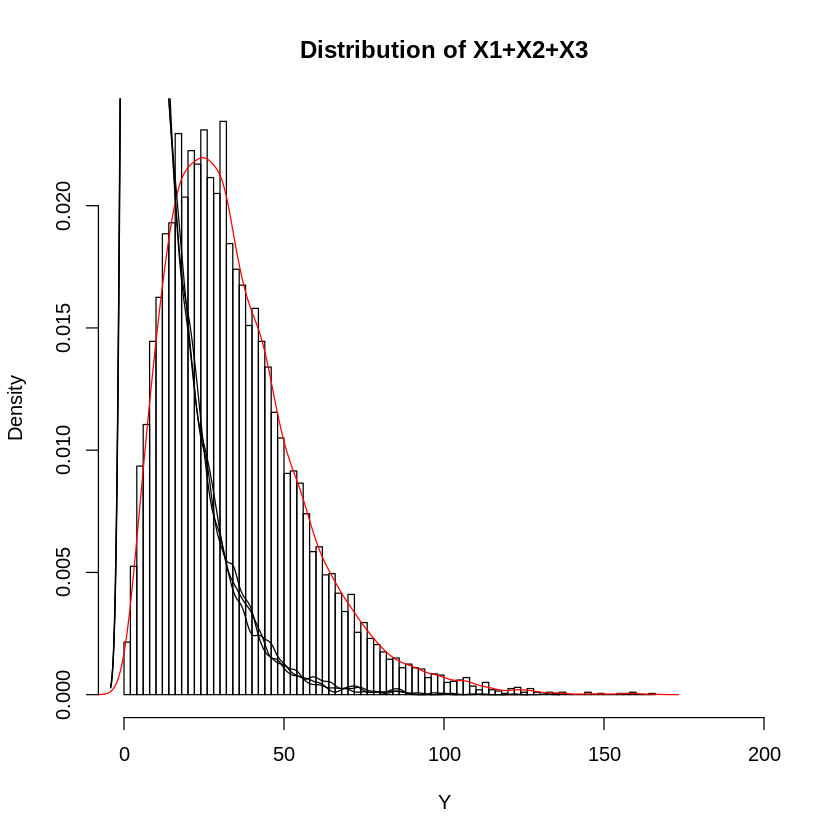

In [97]:
set.seed(42)
samples = 3
X <- list(mode="vector",length=samples)
for (i in 1:samples) {
  X[[i]] <- rgeom(10000, p = 0.08)
}

Y <- vector(length=10000)
for (i in 1:3){
    Y = Y + X[[i]]
}
d_sum = density(Y)
d_1 = density(X[[1]])
d_2 = density(X[[2]])
d_3 = density(X[[3]])

hist(Y, breaks=100, freq=FALSE, xlim=c(0,200), main="Distribution of X1+X2+X3")
lines(d_sum, col="red")
lines(d_1)
lines(d_2)
lines(d_3)

## Exercise 3
Show in 𝖱, also graphically, that Gamma(n/2,1/2) coincides with a χ2n.



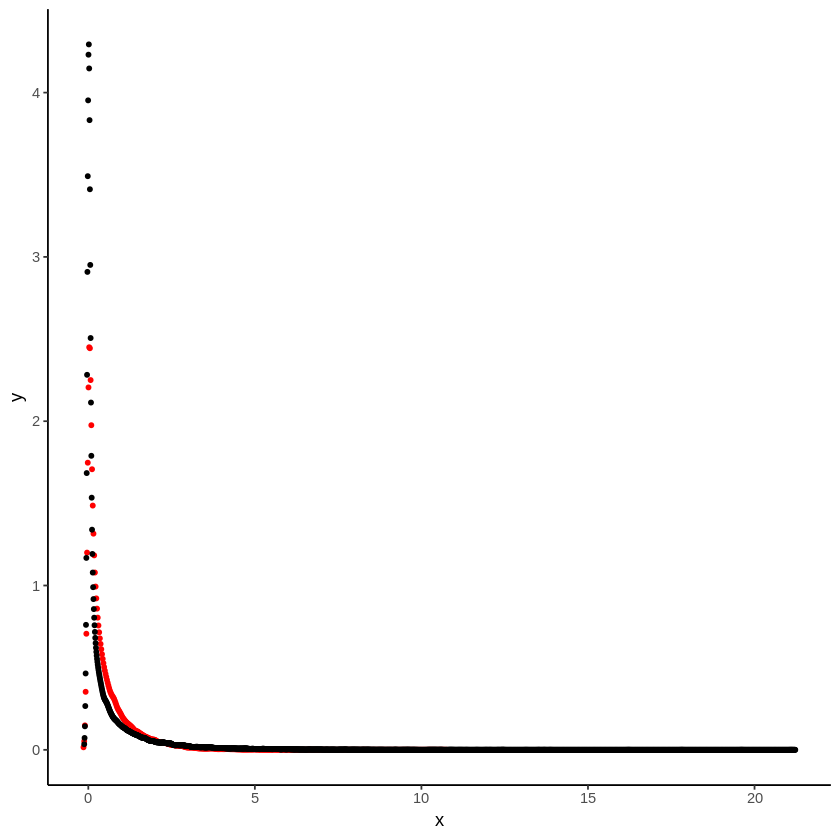

In [147]:
n = 100000

y1 = rgamma (n, 0.5)
den1 = density(y1, n=2000)
dat1 = data.frame(x=den$x, y=den$y)

y2= rchisq(n/2,df=0.5)
den2= density(y2, n=2000)
dat2= data.frame(x=den2$x, y=den2$y)

library(ggplot2)
p<- ggplot()+
    geom_point(data= dat1, aes(x=x, y=y),size=1, col="red")+
    geom_point(data= dat2, aes(x=x, y=y), size=1)+
    theme_classic()

p

# red   : gamma
# black : chisquared


Find the 5% and the 95% quantiles of a Gamma(3,3).

In [149]:
qgamma (c(0.05,0.95),3,3)

[1] 0.2725638 2.0985979